# Part II - PROSPECT LOAN DATA ANALYSIS
## by Haron Nyamai Wambua


## Investigation Overview

* In the analysis I was finding out the features that affect the amount of loan interest charged to a borrower. From the plots made and especially the facet grid on the multivariate analysis, I discovered that the more the amount one earns, the higher the chance of getting a huge amount of loan at a lower interest rate (borrowerrate).
* It also appeared that as the number of investors increase, the interest rate went down. It was also clear that very few people who are employed full time had their loan status past certain due time. This trend was brought of by the fact that on average according to the box plots plotted the interest rates for full time employees is fair low. Again it was noted that those that had loan status past due date, majority had less than 500 investors. This was because the more the number of investors the less the amount of interest paid as shown in the facet grid. Again, it was evident that very few of the retired class of employment status had their loan status past due dates just like the full time employees where it was also demonstrated from the box plots that the the retired people had fairly low interest rates charged upon them.


## Dataset Overview

This dataset consists 113,937 rows  and 81 columns giving information on loans provided. The columns or features include:loan amount, borrower rate (or interest rate), current loan status, borrower income, and many other features relating to loans. The dataset information can be found [Dataset information](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# Loading loans dataset in a pandas dataframe
loans=pd.read_csv('prosperLoanData.csv')
#pd.set_option('dispaly.max_cols',None)
loans.head(1)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258


## Cleaning the data.
+ This involved selecting the features to be used in the analysis
+ Cleaning the columns to be for efficient analysis
+ Cleaning them by converting the categorical columns into categorical datatypes and dates to datetime

In [6]:
# Creating the subframe from the main dataframe.
loan=loans[['LoanStatus','BorrowerRate','ProsperRating (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus','EmploymentStatusDuration','IsBorrowerHomeowner','CurrentlyInGroup','CurrentCreditLines','TotalInquiries', 'TotalTrades', 'IncomeRange', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'Investors','LoanOriginationDate']]
# Checking randomly 5 rows
loan.sample(1)

,LoanStatus,BorrowerRate,ProsperRating (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CurrentCreditLines,TotalInquiries,TotalTrades,IncomeRange,DebtToIncomeRatio,LoanOriginalAmount,Investors,LoanOriginationDate
100177,Completed,0.071,7.0,CA,Professional,Full-time,40.0,True,False,6.0,0.0,9.0,"$100,000+",0.01,2600,110,2010-05-05 00:00:00


In [7]:
# Removing the space and converting into lowercase
loan.columns=loan.columns.str.strip().str.lower()

In [8]:
# Renaming the columns
loan.rename(columns={'prosperrating (numeric)':'pro_rating',
      'employmentstatusduration':'employmentduration'},inplace=True)

In [9]:
# Converting loanoriginationdate to datetime
loan.loanoriginationdate=pd.to_datetime(loan.loanoriginationdate)

In [10]:
# ordinal categorical columns
ordinal_columns={'pro_rating':[1,2,3,4,5,6,7],
                'incomerange':['Not displayed','Not employed','$0',
                              '$1-24,999','$25,000-49,999','$50,000-74,999',
                              '$75,000-99,999','$100,000+']}
for item in ordinal_columns:
    ordered_column=pd.api.types.CategoricalDtype(categories=ordinal_columns[item],ordered=True)
    loan[item]=loan[item].astype(ordered_column)

In [11]:
# Saving the transfored data.
loan.to_csv('transformedloansdata',index=False)

In [13]:
# load in the dataset into a pandas dataframe
data=pd.read_csv('transformedloansdata')
data.head(1)

,loanstatus,borrowerrate,pro_rating,borrowerstate,occupation,employmentstatus,employmentduration,isborrowerhomeowner,currentlyingroup,currentcreditlines,totalinquiries,totaltrades,incomerange,debttoincomeratio,loanoriginalamount,investors,loanoriginationdate
0,Completed,0.158,NaN,CO,Other,Self-employed,2.0,True,True,5.0,3.0,11.0,"$25,000-49,999",0.17,9425,258,2007-09-12


## Interest rate verses income range
+ The \\$0 class seem to have a lower interest rate. This could be because they may  be volunteers or employees working under probation. However from \\$1 to \\$100,000+, the interest rate on average has a decreasing trend. This could be because the higher the salary the higher the chance for getting bigger loan amounts which we realised attracted smaller interest rates.
+ The higher the average salary/income, the higher the chance for getting huge loan amount. 


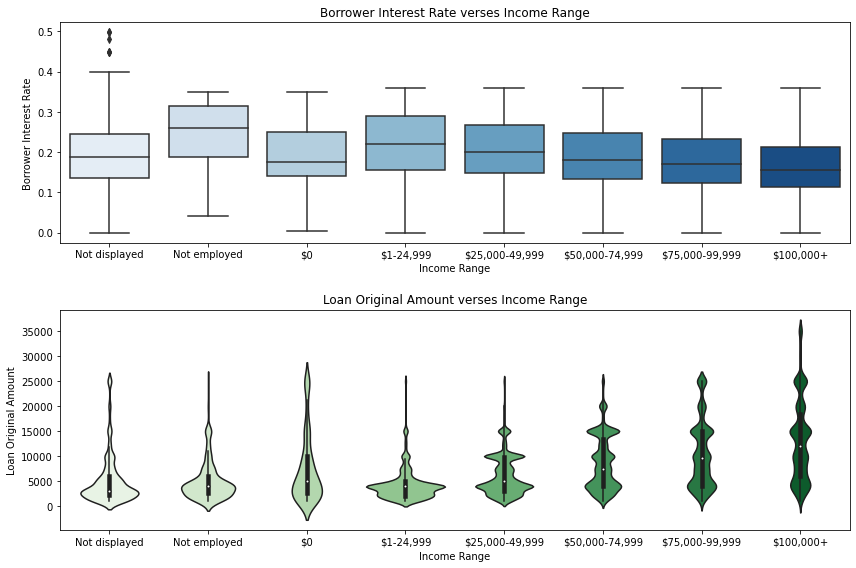

In [17]:
# Plotting boxplots/violin to help understand the relationship between the target variable (borrowerrate) and other features.
ordered=['Not displayed','Not employed','$0',
                              '$1-24,999','$25,000-49,999','$50,000-74,999',
                              '$75,000-99,999','$100,000+']
plt.figure(figsize = (12, 8))
plt.subplot(2,1,1)           
sb.boxplot(data=data,y='borrowerrate',x='incomerange',palette='Blues',order=ordered);
plt.xlabel('Income Range');
plt.ylabel('Borrower Interest Rate');
plt.title('Borrower Interest Rate verses Income Range');

plt.subplot(2,1,2)           
sb.violinplot(data=data,y='loanoriginalamount',x='incomerange',palette='Greens',order=ordered);
plt.xlabel('Income Range');
plt.ylabel('Loan Original Amount');
plt.title('Loan Original Amount verses Income Range');


plt.tight_layout(h_pad=2)

## Loan Amount verses Interest rate in comparison to the income range
 It was noted that the more the amount one earns, the higher the chance of getting a huge amount of loan and hence a lower interest rate.

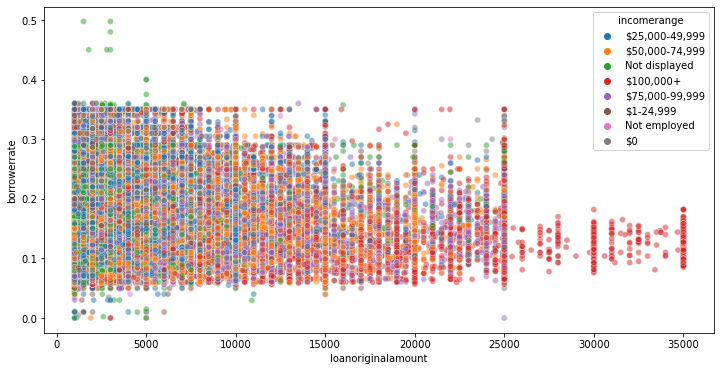

In [18]:
# Check interest and loan amount in respect to income range.
plt.figure(figsize=(12,6))
sb.scatterplot(data=data,x='loanoriginalamount',y='borrowerrate',hue='incomerange',alpha=0.5);

## Interest rate verses Investors with respect to loan status and employment status

It appears that as the number of investors increase, the interest rate goes down. It is also clear that very few people who are employed full time have their loan status past certain due time partly could be because the interest rates are low. Again it can be noted that those that have loan status past due date, majority have  less than 500 investors sinc there was a weak trend of a reduction of interest rate as the number of investors increase. Again it is evident that very few of the retired class of employment status have their loan status past due dates just like the full time employees low interest rate contributing to this trend. 

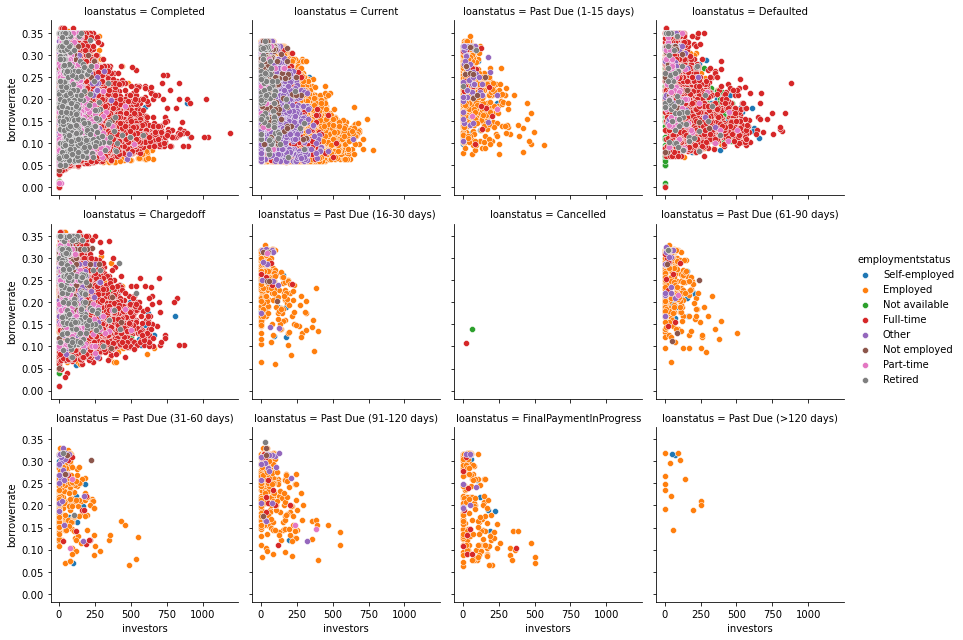

In [19]:
# Ploting a facetgrid to show the relationship between 4 important features in the dataset
g=sb.FacetGrid(data=data,col='loanstatus',col_wrap=4,hue='employmentstatus',margin_titles=False)
g.map(sb.scatterplot,'investors','borrowerrate')
g.add_legend();

In [25]:
!jupyter nbconvert Part_II_slide_deck_haron.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_haron.ipynb to slides
[NbConvertApp] Writing 1189972 bytes to Part_II_slide_deck_haron.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "E:\APPLICATIONS\Office\anacodaharon\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "E:\APPLICATIONS\Office\anacodaharon\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "E:\APPLICATIONS\Office\anacodaharon\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "E:\APPLICATIONS\Office\anacodaharon\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "E:\APPLICATIONS\Office\anacodaharon\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_no